In [56]:
import numpy as np
from sympy import symbols, Matrix, simplify, pprint
import matplotlib.pyplot as plt
from pyscf import gto, scf
from scipy.linalg import fractional_matrix_power
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')

import plottingsystem as pts

In [20]:
Benzaldehyd = """
  O    0.0000000   -0.3747529    2.7786900
  C    0.0000000    0.5269910    1.9551982
  C    0.0000000    0.2376295    0.5060205
  C    0.0000000   -1.0852345    0.0266662
  C    0.0000000   -1.3359380   -1.3493282
  C    0.0000000   -0.2724332   -2.2556391
  C    0.0000000    1.0441707   -1.7877091
  C    0.0000000    1.2999056   -0.4126999
  H    0.0000000    1.5555215    2.3025976
  H    0.0000000   -2.3553900   -1.7130346
  H    0.0000000    1.8672472   -2.4906213
  H    0.0000000    2.3262893   -0.0663518
  H    0.0000000   -1.9229802    0.7128335
  H    0.0000000   -0.4684830   -3.3200858
"""
extra_bounds = [(2,7)]
carbon_coordinates = pts.taking_carbon_coordinates(Benzaldehyd)
coordinates = pts.taking_x_and_y_coordinate(carbon_coordinates)
print(coordinates)

Benzaldehyd_molecule = gto.M(atom=Benzaldehyd, basis='sto-3g')#'sto-6g''ccpvdz'

pz_indices = pts.taking_indices(Benzaldehyd_molecule, ['C 2px', 'O 2px'])
print(pz_indices)
hf = scf.RHF(Benzaldehyd_molecule)
hf_energy = hf.kernel()

[[ 2.77869   -0.3747529]
 [ 1.9551982  0.526991 ]
 [ 0.5060205  0.2376295]
 [ 0.0266662 -1.0852345]
 [-1.3493282 -1.335938 ]
 [-2.2556391 -0.2724332]
 [-1.7877091  1.0441707]
 [-0.4126999  1.2999056]]
[2, 7, 12, 17, 22, 27, 32, 37]
converged SCF energy = -339.116949099733


In [21]:
mo_coeff = hf.mo_coeff.round(6)
mo_coeff = pts.normaliseer(mo_coeff)

In [22]:
mo_eigenvalues = hf.mo_energy[[21,24,26,27,28,29,30,31]]
print(mo_eigenvalues)
pz_AO_MO = mo_coeff[pz_indices][:,[21,24,26,27,28,29,30,31]]
print(pz_AO_MO)

[-0.48899761 -0.42468836 -0.28867693 -0.27817089  0.20595476  0.25834372
  0.34755185  0.50654454]
[[ 0.40471733  0.57397007  0.02501306 -0.33934346  0.46346069  0.00072008
  -0.45144644  0.13531731]
 [ 0.46327043  0.51454395  0.00982005 -0.13393169 -0.37398465  0.00282325
   0.56713954 -0.23948446]
 [ 0.44700508 -0.03986203 -0.0356092   0.54427964 -0.41756489 -0.01078193
  -0.3382155   0.46886142]
 [ 0.32612504 -0.19243638  0.47925229  0.31766431  0.32251037 -0.49705521
   0.02147839 -0.39971168]
 [ 0.26549808 -0.31402389  0.51990231 -0.21592558  0.16959056  0.50177878
   0.29322637  0.36528095]
 [ 0.24516246 -0.36054034  0.04039928 -0.52454652 -0.45499916 -0.00356705
  -0.42842475 -0.3529283 ]
 [ 0.26955384 -0.31663364 -0.47818856 -0.29056192  0.17716122 -0.49760932
   0.30002906  0.36193142]
 [ 0.33490323 -0.19576755 -0.51742857  0.2521076   0.31590347  0.50339019
   0.01228376 -0.39465561]]


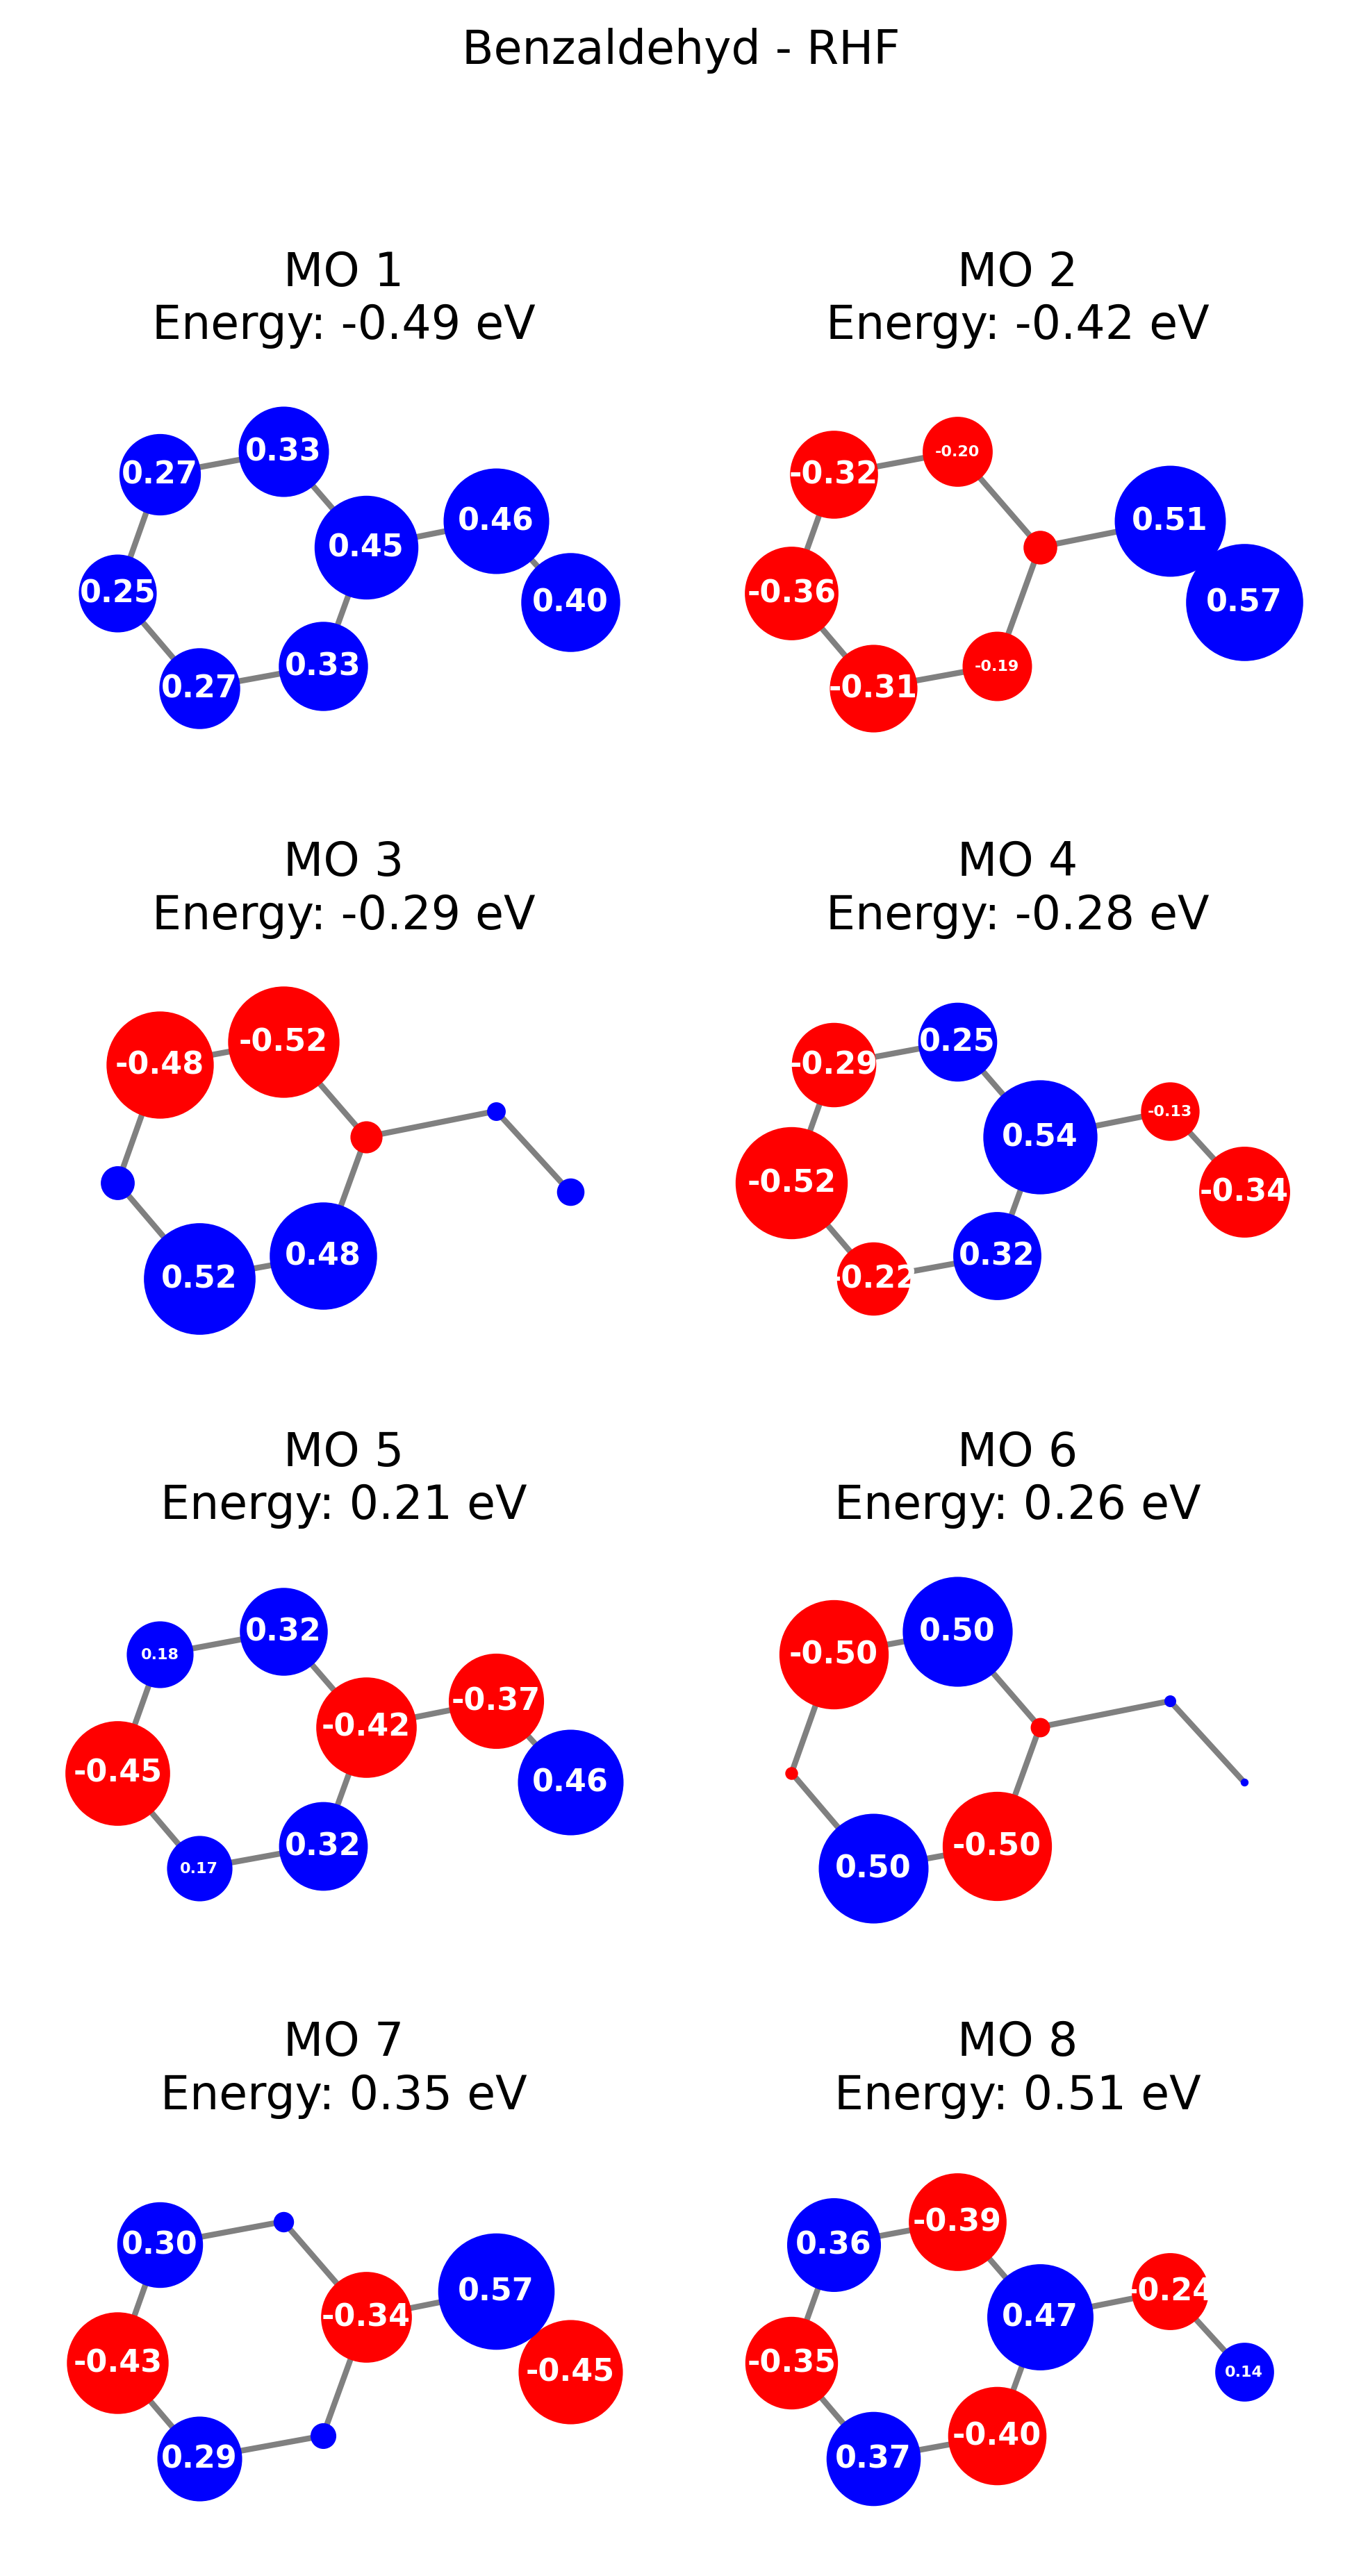

In [23]:
pts.plot_MOs(mo_eigenvalues, pz_AO_MO, coordinates, extra_bounds, 'Benzaldehyd', 'RHF', fig_size = (5,10))

In [26]:
D_rhf = pts.making_D(pz_AO_MO, 8)
print(D_rhf)

[[ 1.21803479e+00  1.05704175e+00 -5.51146819e-02 -1.48548020e-01
   2.69772736e-02  1.42588137e-01  2.79884052e-02 -1.50634213e-01]
 [ 1.05704175e+00  9.94818204e-01  2.26654982e-01  2.84561442e-02
  -9.11387799e-03 -2.57441165e-03 -7.65197258e-03  3.11467733e-02]
 [-5.51146819e-02  2.26654982e-01  9.97821736e-01  6.18565770e-01
  -9.68115410e-03 -3.25955688e-01 -1.60108691e-02  6.26298768e-01]
 [-1.48548020e-01  2.84561442e-02  6.18565770e-01  9.47965362e-01
   6.55175440e-01  4.13286388e-03 -3.45268053e-01 -4.20002357e-02]
 [ 2.69772736e-02 -9.11387799e-03 -9.68115410e-03  6.55175440e-01
   9.72045008e-01  6.25150260e-01 -2.97500557e-02 -3.46113873e-01]
 [ 1.42588137e-01 -2.57441165e-03 -3.25955688e-01  4.13286388e-03
   6.25150260e-01  9.33750234e-01  6.26676907e-01 -9.16212029e-04]
 [ 2.79884052e-02 -7.65197258e-03 -1.60108691e-02 -3.45268053e-01
  -2.97500557e-02  6.26676907e-01  9.72013318e-01  6.52873193e-01]
 [-1.50634213e-01  3.11467733e-02  6.26298768e-01 -4.20002357e-02
  -

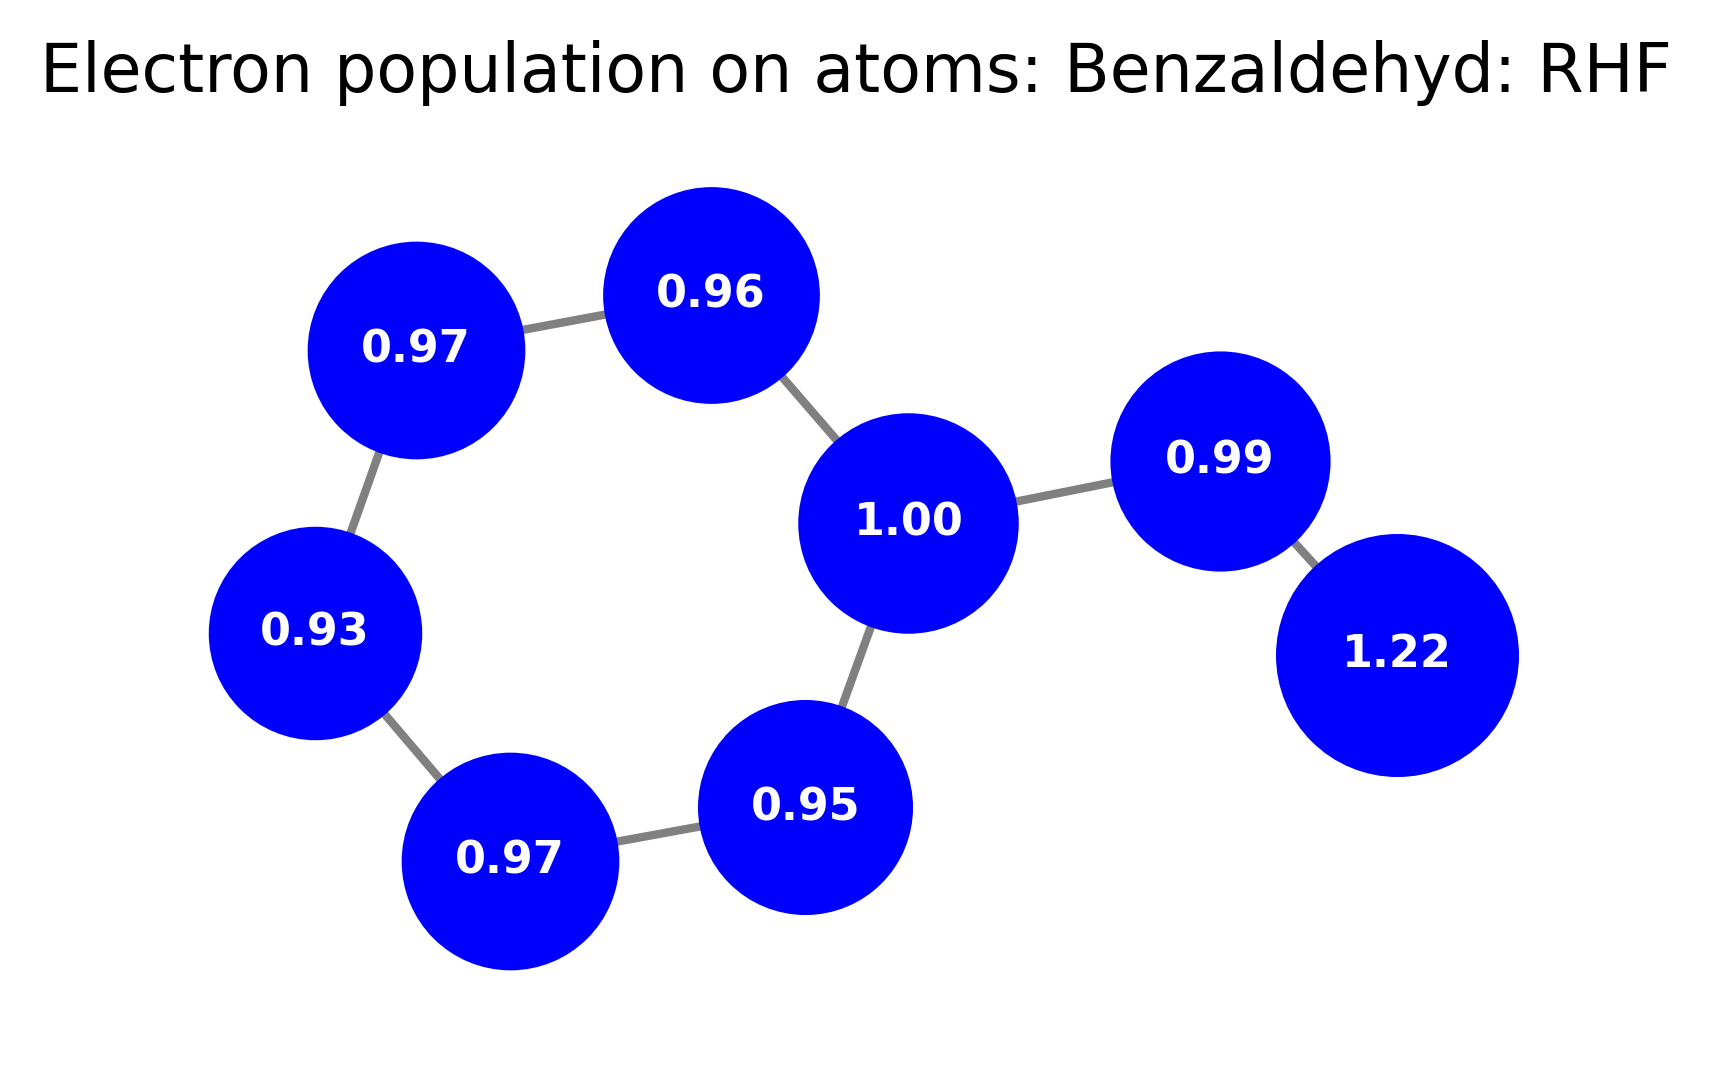

In [35]:
pts.plotting_of_D_atoms(8, coordinates, extra_bounds, D_rhf, 'Benzaldehyd', 'RHF',(5,3))

In [48]:
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel
benzaldehyd = huckel(10, -2, -1)
benzaldehyd.create_matrix()
a = -0.14
b= -0.18
O = -0.22
OC = -0.21
benzaldehyd.huckel_matrix = np.array([
    [O, OC, 0, 0, 0, 0, 0, 0],
    [OC, a, b, 0, 0, 0, 0, 0],
    [0, b, a, b, 0, 0, 0, b],
    [0, 0, b, a, b, 0, 0, 0],
    [0, 0, 0, b, a, b, 0, 0],
    [0, 0, 0, 0, b, a, b, 0],
    [0, 0, 0, 0, 0, b, a, b],
    [0, 0, b, 0, 0, 0, b, a],
  
])
huc_mat = benzaldehyd.huckel_matrix

print(huc_mat)

[[-0.22 -0.21  0.    0.    0.    0.    0.    0.  ]
 [-0.21 -0.14 -0.18  0.    0.    0.    0.    0.  ]
 [ 0.   -0.18 -0.14 -0.18  0.    0.    0.   -0.18]
 [ 0.    0.   -0.18 -0.14 -0.18  0.    0.    0.  ]
 [ 0.    0.    0.   -0.18 -0.14 -0.18  0.    0.  ]
 [ 0.    0.    0.    0.   -0.18 -0.14 -0.18  0.  ]
 [ 0.    0.    0.    0.    0.   -0.18 -0.14 -0.18]
 [ 0.    0.   -0.18  0.    0.    0.   -0.18 -0.14]]


In [49]:
benzaldehyd.solve_huckel_matrix()
eigenvalues = benzaldehyd.eigenvalues
eigenvectors = benzaldehyd.eigenvectors
print(eigenvectors)
eigenvectors = - eigenvectors

[[-0.25057813  0.51289827  0.          0.53260128  0.51760327 -0.
  -0.31910917 -0.14400708]
 [-0.37146709  0.49621712  0.          0.19186205 -0.46562411  0.
   0.51016612  0.31920908]
 [-0.515213    0.18225    -0.         -0.455461   -0.322138   -0.
  -0.352514   -0.515613  ]
 [-0.37429208 -0.10475402 -0.5000001  -0.29285406  0.33026907 -0.5000001
  -0.00467     0.39251608]
 [-0.29848397 -0.34704496 -0.49999994  0.20222398  0.12230499  0.49999994
   0.35914796 -0.32500296]
 [-0.27459892 -0.44120587 -0.          0.46772187 -0.40427089 -0.
  -0.50558286  0.30351291]
 [-0.29848397 -0.34704496  0.49999994  0.20222398  0.12230499 -0.49999994
   0.35914796 -0.32500296]
 [-0.37429208 -0.10475402  0.5000001  -0.29285406  0.33026907  0.5000001
  -0.00467     0.39251608]]


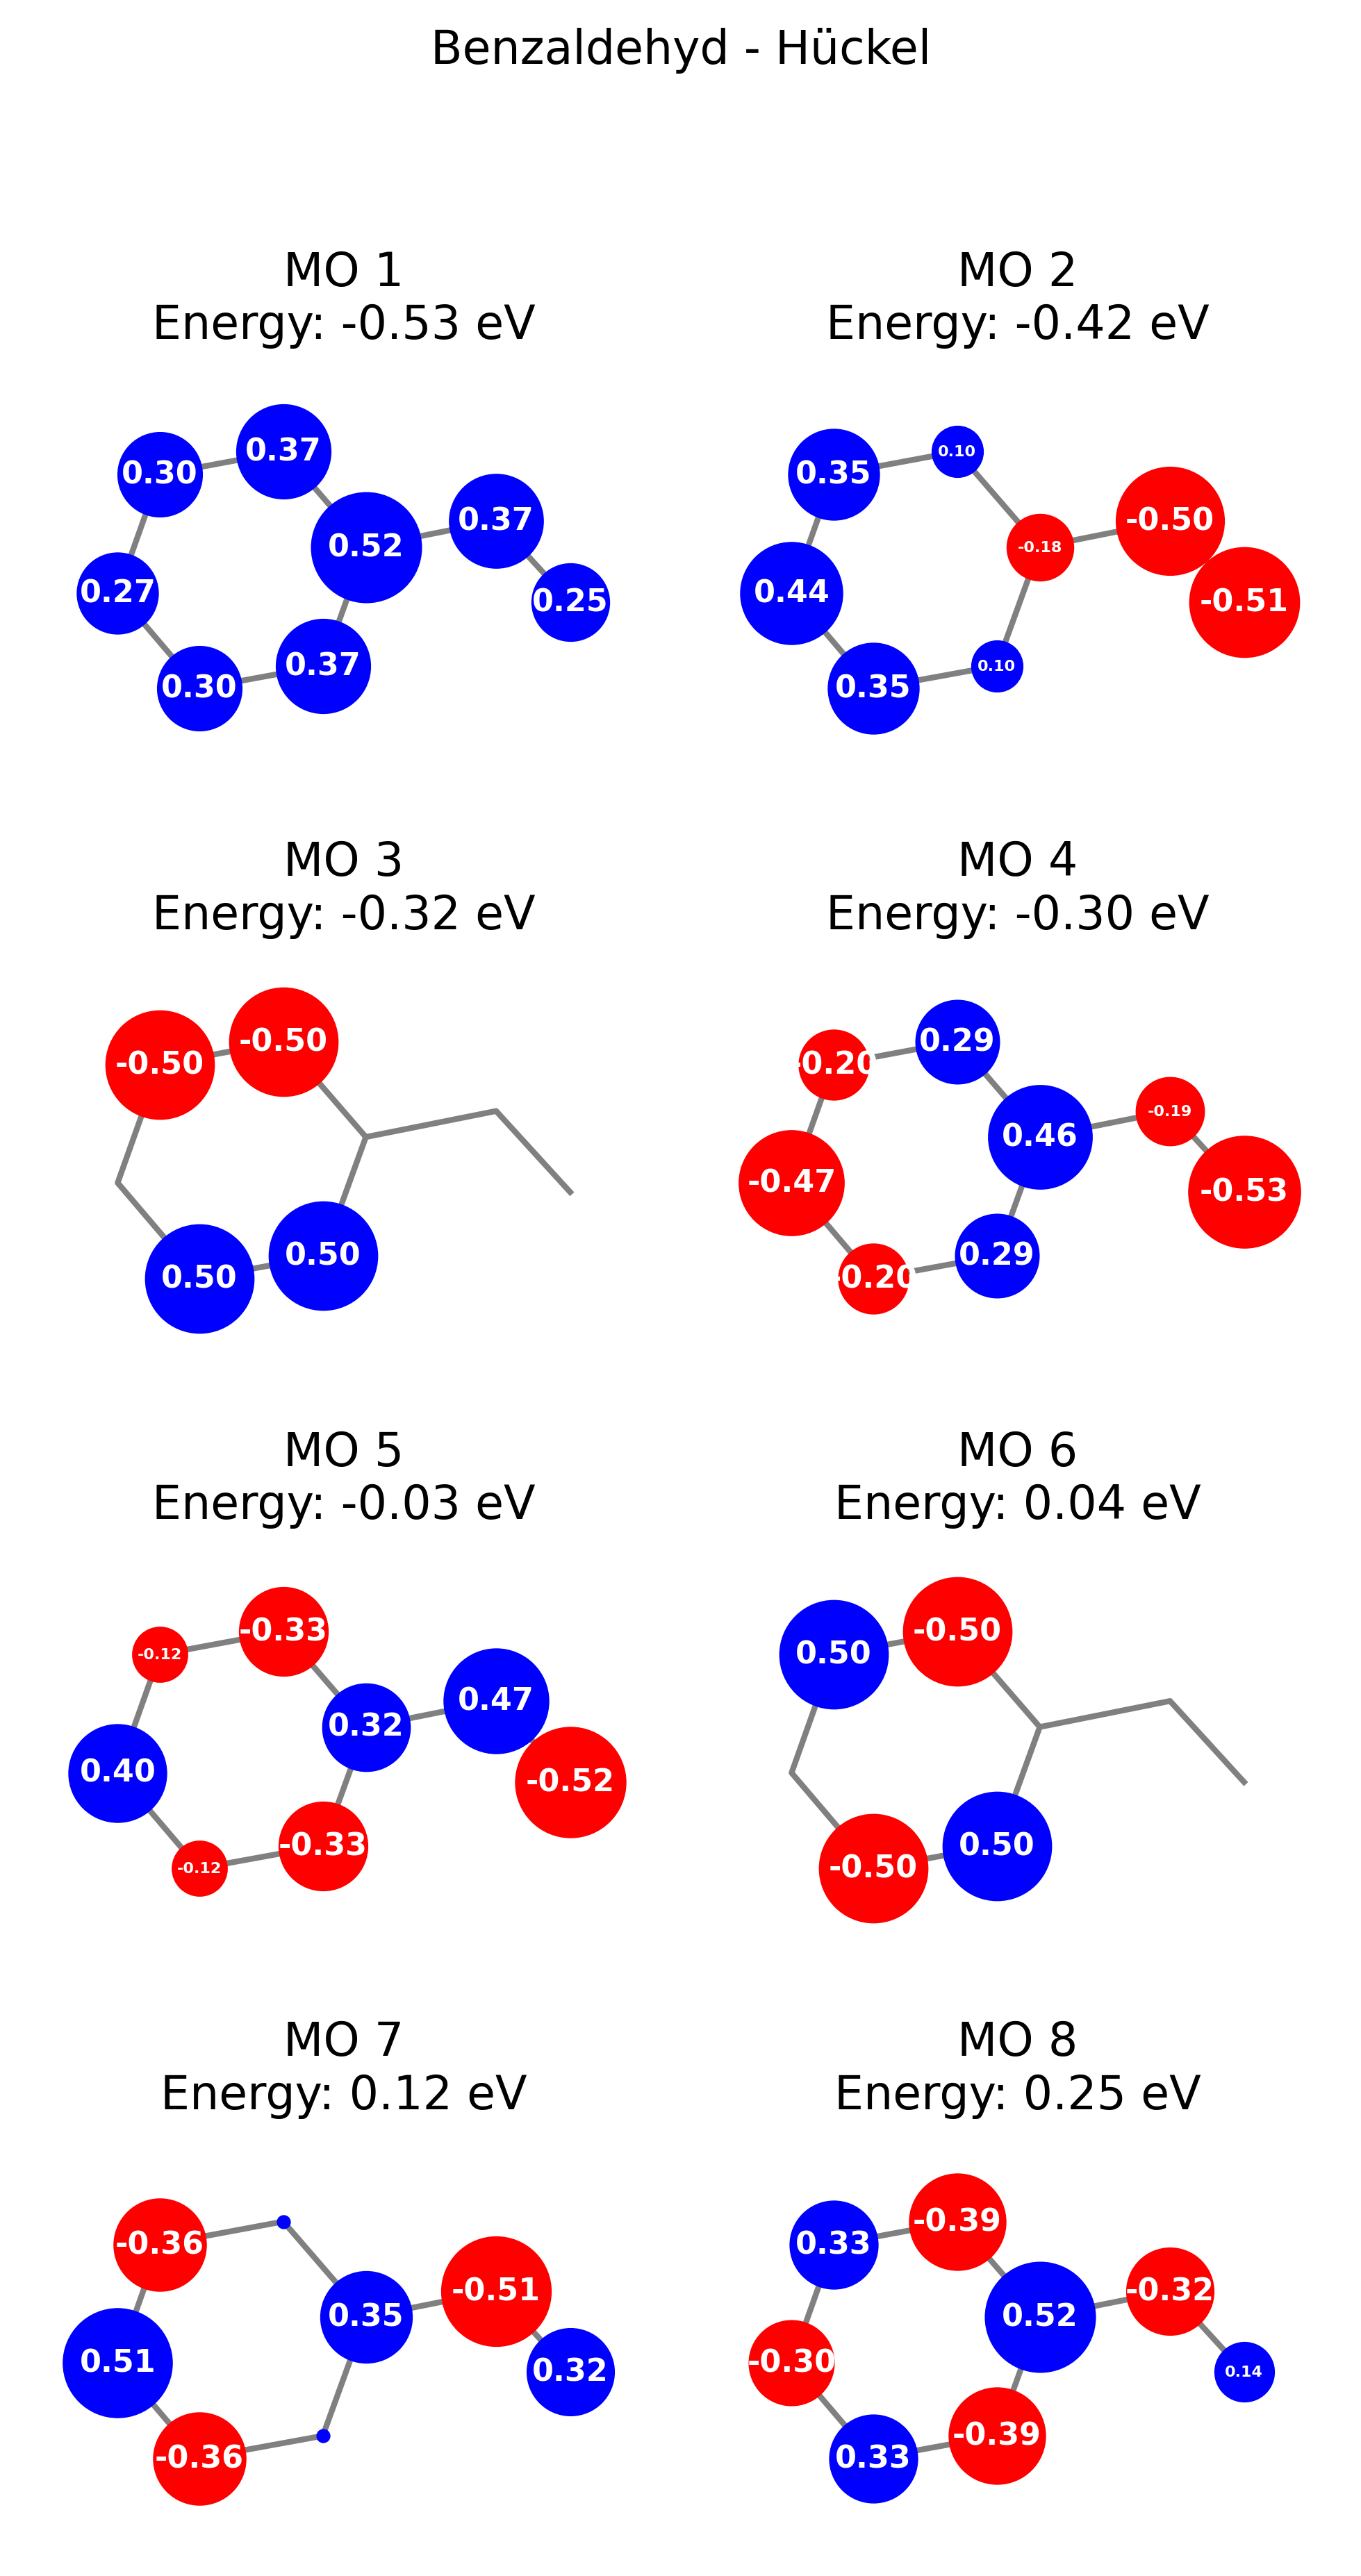

In [50]:
pts.plot_MOs(eigenvalues, eigenvectors, coordinates, extra_bounds, 'Benzaldehyd', 'Hückel', (5,10))

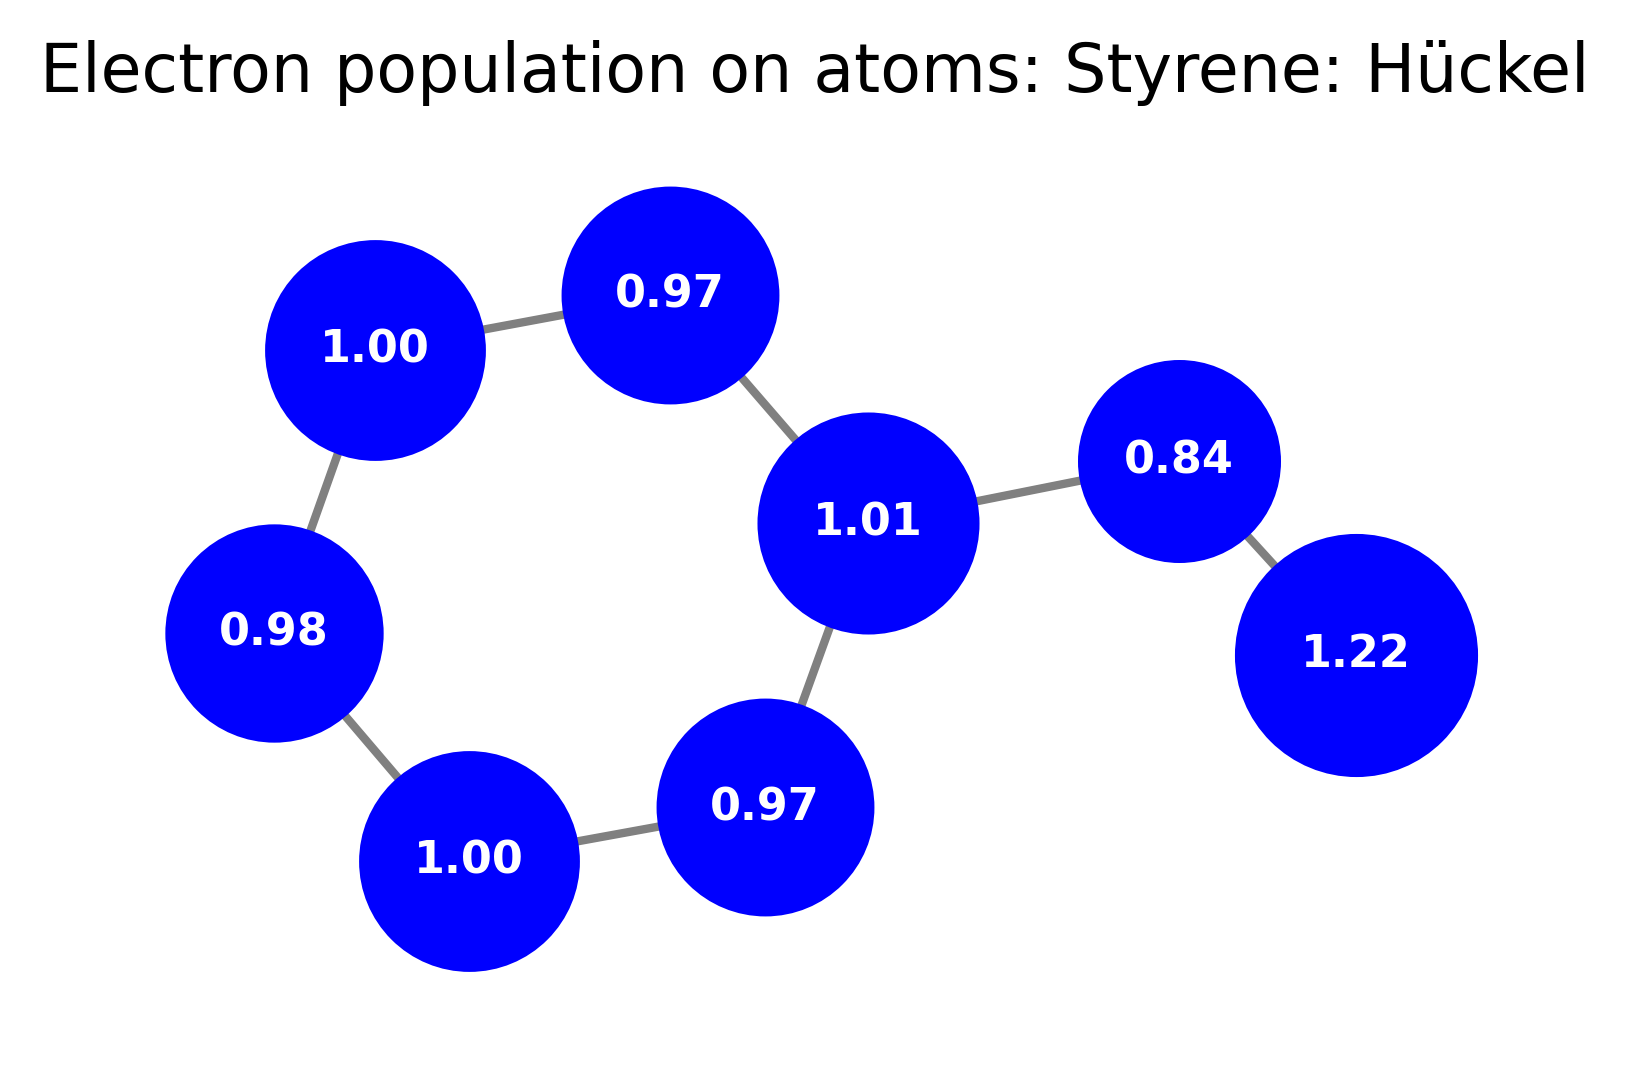

In [52]:
D_huckel = pts.making_D(eigenvectors, 8)

pts.plotting_of_D_atoms(8, coordinates, extra_bounds, D_huckel, 'Styrene', 'Hückel', (5,3))

In [53]:
IP = {
    'H 1s': 13.6,
    'C 2s': 21.4, 'C 2p': 11.4,
    'N 2s': 25.58, 'N 2p': 13.9,
    'O 2s': 32.38, 'O 2p': 15.85,
    'F 2s': 40.20, 'F 2p': 18.66
}
K = 1.75

In [54]:
print(Benzaldehyd_molecule.ao_labels())
indices_valence_orbitals = pts.taking_indices(Benzaldehyd_molecule, IP.keys())
print(indices_valence_orbitals)
valence_orbitals = [label for index,label in enumerate(Benzaldehyd_molecule.ao_labels()) if index in indices_valence_orbitals]
print(valence_orbitals)
alg_valence_orbitals = [label[2::].lstrip()[:4] for label in valence_orbitals]
pz_indices_full = [i for i, label in enumerate(valence_orbitals) for a in ['C 2px', 'O 2px'] if a in label]

print(alg_valence_orbitals)
print(pz_indices_full)

['0 O 1s    ', '0 O 2s    ', '0 O 2px   ', '0 O 2py   ', '0 O 2pz   ', '1 C 1s    ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 1s    ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 1s    ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 C 1s    ', '4 C 2s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '5 C 1s    ', '5 C 2s    ', '5 C 2px   ', '5 C 2py   ', '5 C 2pz   ', '6 C 1s    ', '6 C 2s    ', '6 C 2px   ', '6 C 2py   ', '6 C 2pz   ', '7 C 1s    ', '7 C 2s    ', '7 C 2px   ', '7 C 2py   ', '7 C 2pz   ', '8 H 1s    ', '9 H 1s    ', '10 H 1s    ', '11 H 1s    ', '12 H 1s    ', '13 H 1s    ']
[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
['0 O 2s    ', '0 O 2px   ', '0 O 2py   ', '0 O 2pz   ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 2s    ', '3 C 2px   ', '3 C 2py 

In [60]:
n = len(indices_valence_orbitals)
print(n)
EHT_full = np.zeros((n,n))

for i, label in enumerate(alg_valence_orbitals):
    alpha = IP[label] 
    EHT_full[i, i] = -alpha 
S_full = hf.get_ovlp()[indices_valence_orbitals][:, indices_valence_orbitals]
for i in range(n):
    for j in range(n):
        if i != j:
            EHT_full[i, j] = EHT_full[j, i] = K*S_full[i,j]*(EHT_full[i,i]+EHT_full[j,j])/2
A = fractional_matrix_power(S_full, -0.5)
A = np.asarray(A)
H_p = A @ EHT_full @ A 
eigenvalues_full, C_p = np.linalg.eigh(H_p)

print(eigenvalues_full)
C = A @ C_p

for i in range(n):
    C[:,i] = (np.dot(C[:,i], C[:,i]))**(-1/2) * C[:,i]


C_0 = C[pz_indices_full,:].round(6)
print(C_0[:,[9,14,18,19,20,21,22,23]])

38
[-34.25406791 -28.94562138 -25.83031196 -25.65184233 -21.52778061
 -20.10817586 -19.06186359 -17.06872685 -16.58651879 -16.35640218
 -16.20103938 -15.51092177 -14.88259089 -14.24895884 -14.22025693
 -14.13576621 -13.39273989 -13.05358587 -12.84529888 -12.69357016
 -10.26851925  -8.8625975   -8.06403608  -5.71414093   1.89577586
   2.25326806   6.26634518   7.15137034   7.30249616   8.3670728
  10.08498437  11.52142114  18.09800205  19.33867358  25.31707491
  29.32486822  30.27815231  41.47704385]
[[-0.949382  0.14839   0.204253 -0.009091  0.347383  0.004627 -0.187089
  -0.079589]
 [-0.305941 -0.087824 -0.230343  0.003857 -0.684084 -0.003006  0.47499
   0.240687]
 [-0.065912 -0.419117 -0.55854   0.020306 -0.189035 -0.007163 -0.463751
  -0.495835]
 [-0.020252 -0.401702 -0.208018  0.510072  0.340608 -0.496115  0.084715
   0.401357]
 [-0.005079 -0.39561   0.31923   0.489444  0.059052  0.503799  0.340654
  -0.354716]
 [-0.002647 -0.394356  0.55337  -0.020222 -0.372813 -0.007395 -0.523768

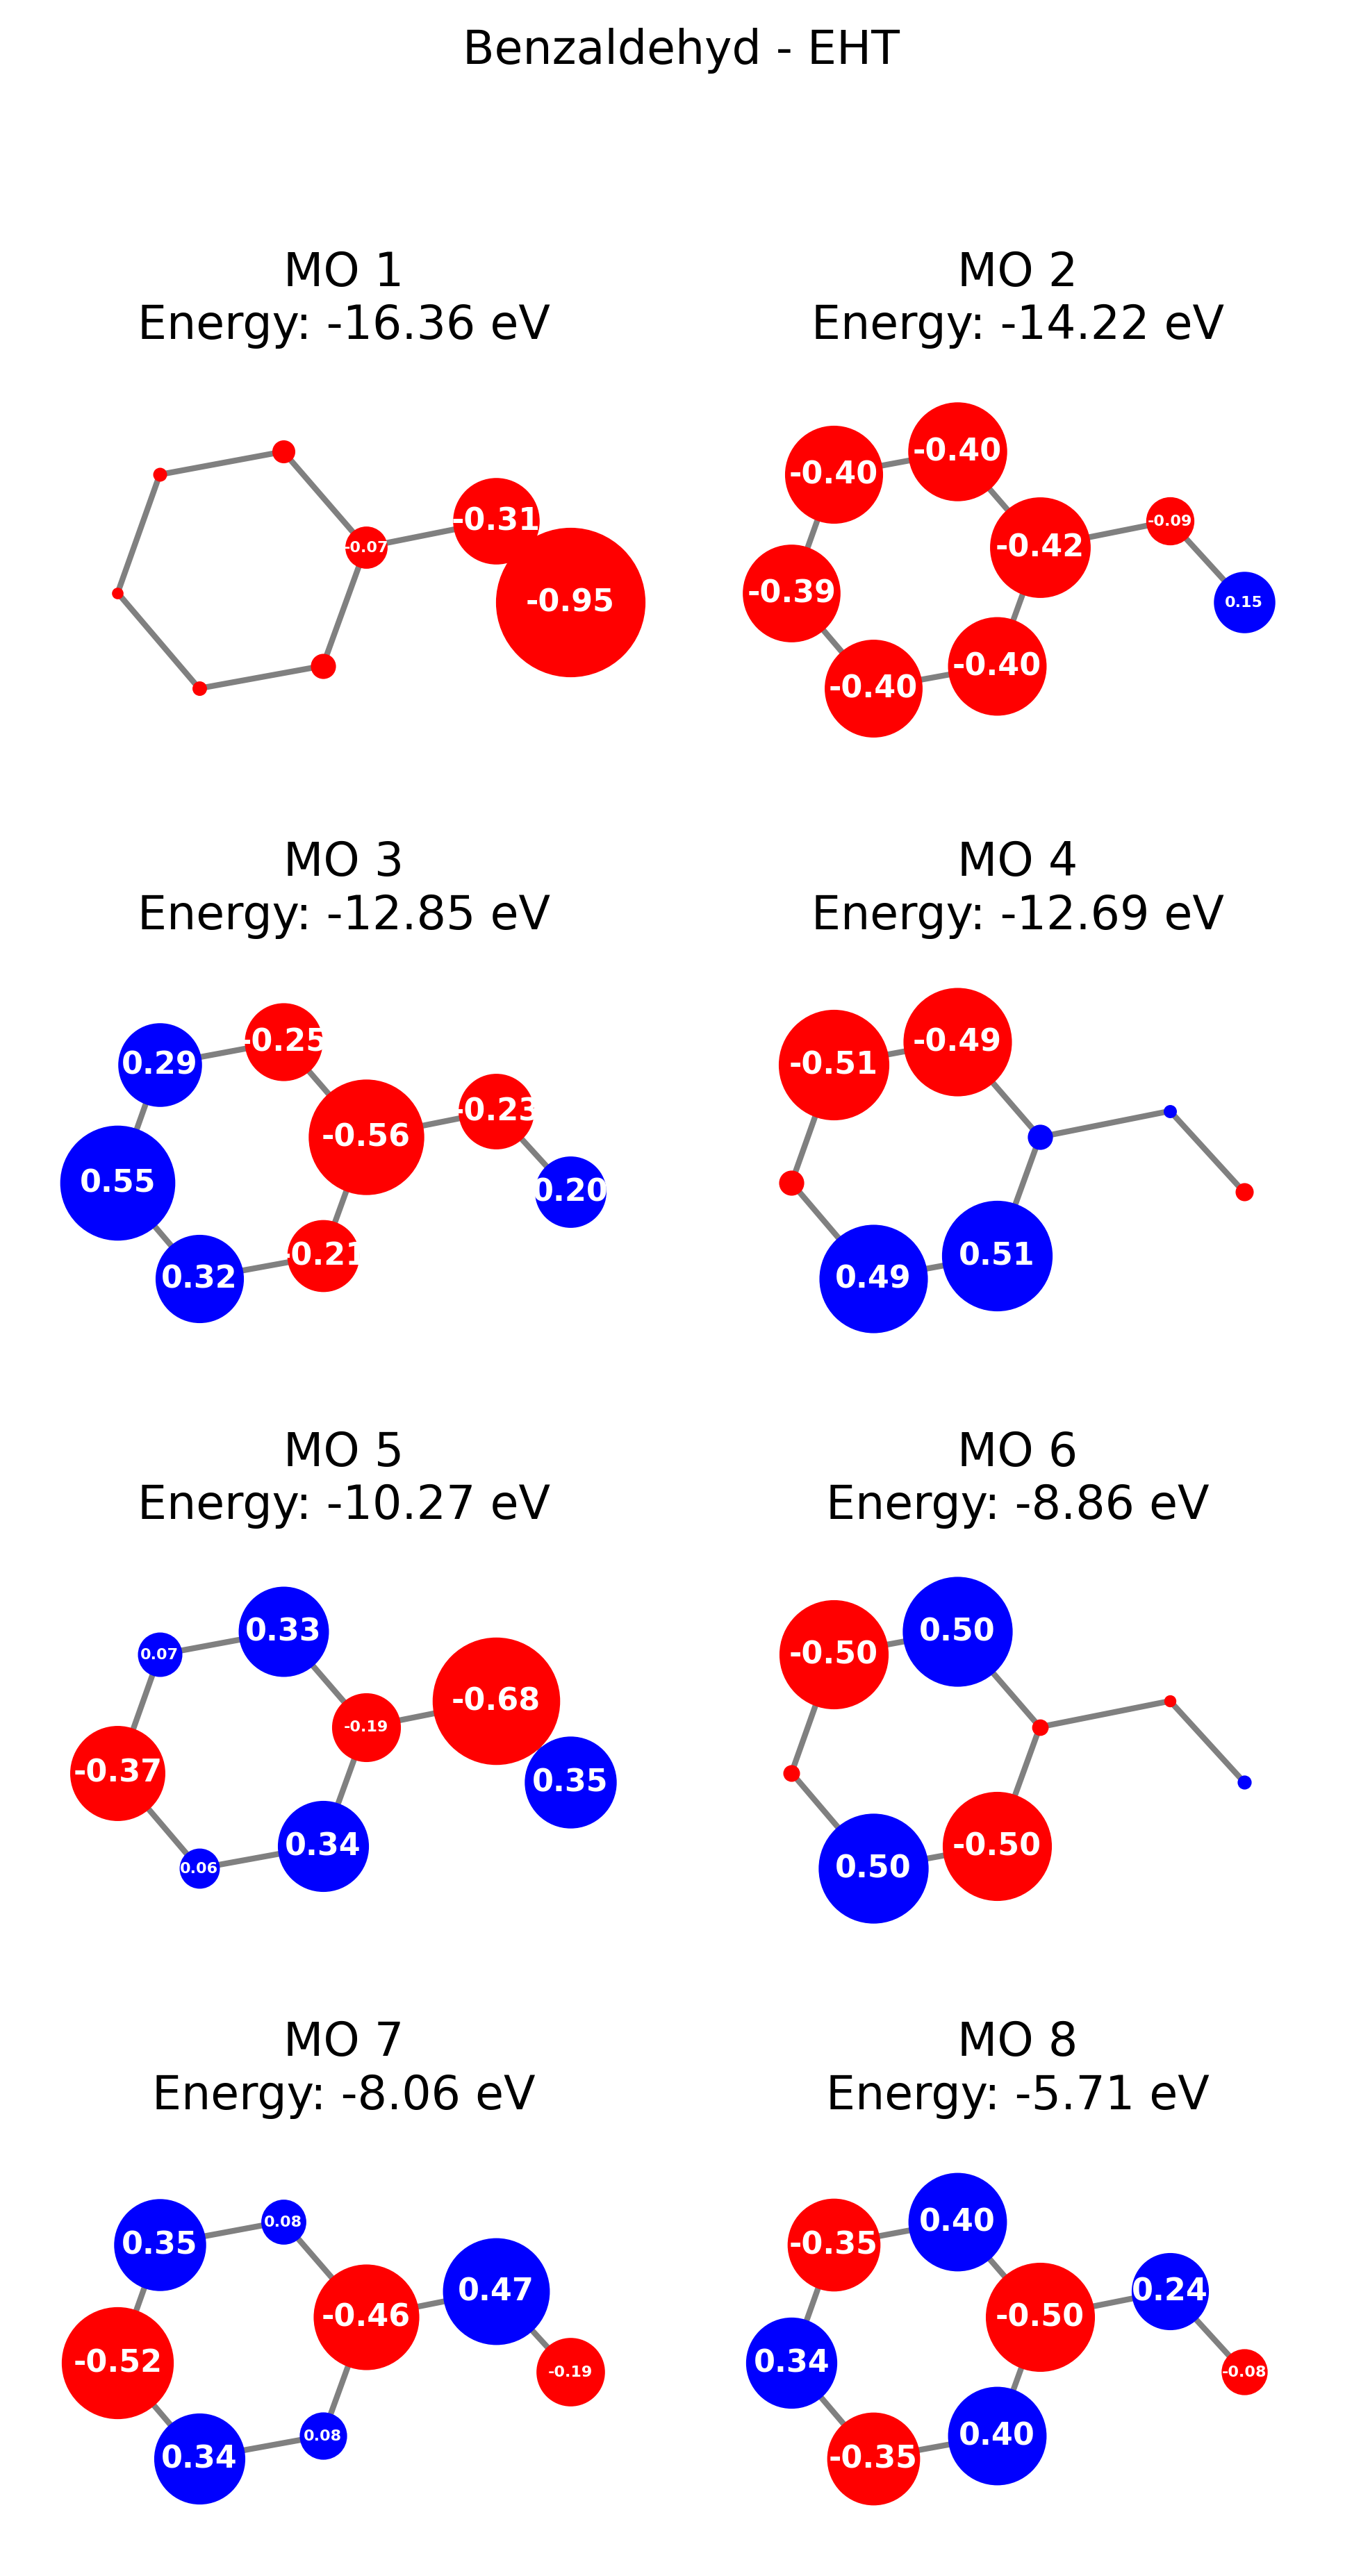

In [62]:
pts.plot_MOs(eigenvalues_full[[9,14,18,19,20,21,22,23]], C_0[:, [9,14,18,19,20,21,22,23]], coordinates, extra_bounds, 'Benzaldehyd', 'EHT', (5,10))

[[ 1.93029542  0.46067872 -0.22777036 -0.17501408  0.01374299  0.1144117
   0.01670893 -0.18044084]
 [ 0.46067872  0.30877145  0.37141563  0.18271566 -0.07069337 -0.18419831
  -0.06305506  0.19040175]
 [-0.22777036  0.37141563  0.98476543  0.59247777 -0.00444486 -0.28806827
  -0.00651133  0.59570395]
 [-0.17501408  0.18271566  0.59247777  0.93043915  0.68453256  0.06608321
  -0.31966897 -0.07153643]
 [ 0.01374299 -0.07069337 -0.00444486  0.68453256  0.99599258  0.64555878
  -0.00242563 -0.31565661]
 [ 0.1144117  -0.18419831 -0.28806827  0.06608321  0.64555878  0.9243019
   0.64975252  0.06730489]
 [ 0.01670893 -0.06305506 -0.00651133 -0.31966897 -0.00242563  0.64975252
   0.99756025  0.68000829]
 [-0.18044084  0.19040175  0.59570395 -0.07153643 -0.31565661  0.06730489
   0.68000829  0.92787553]]


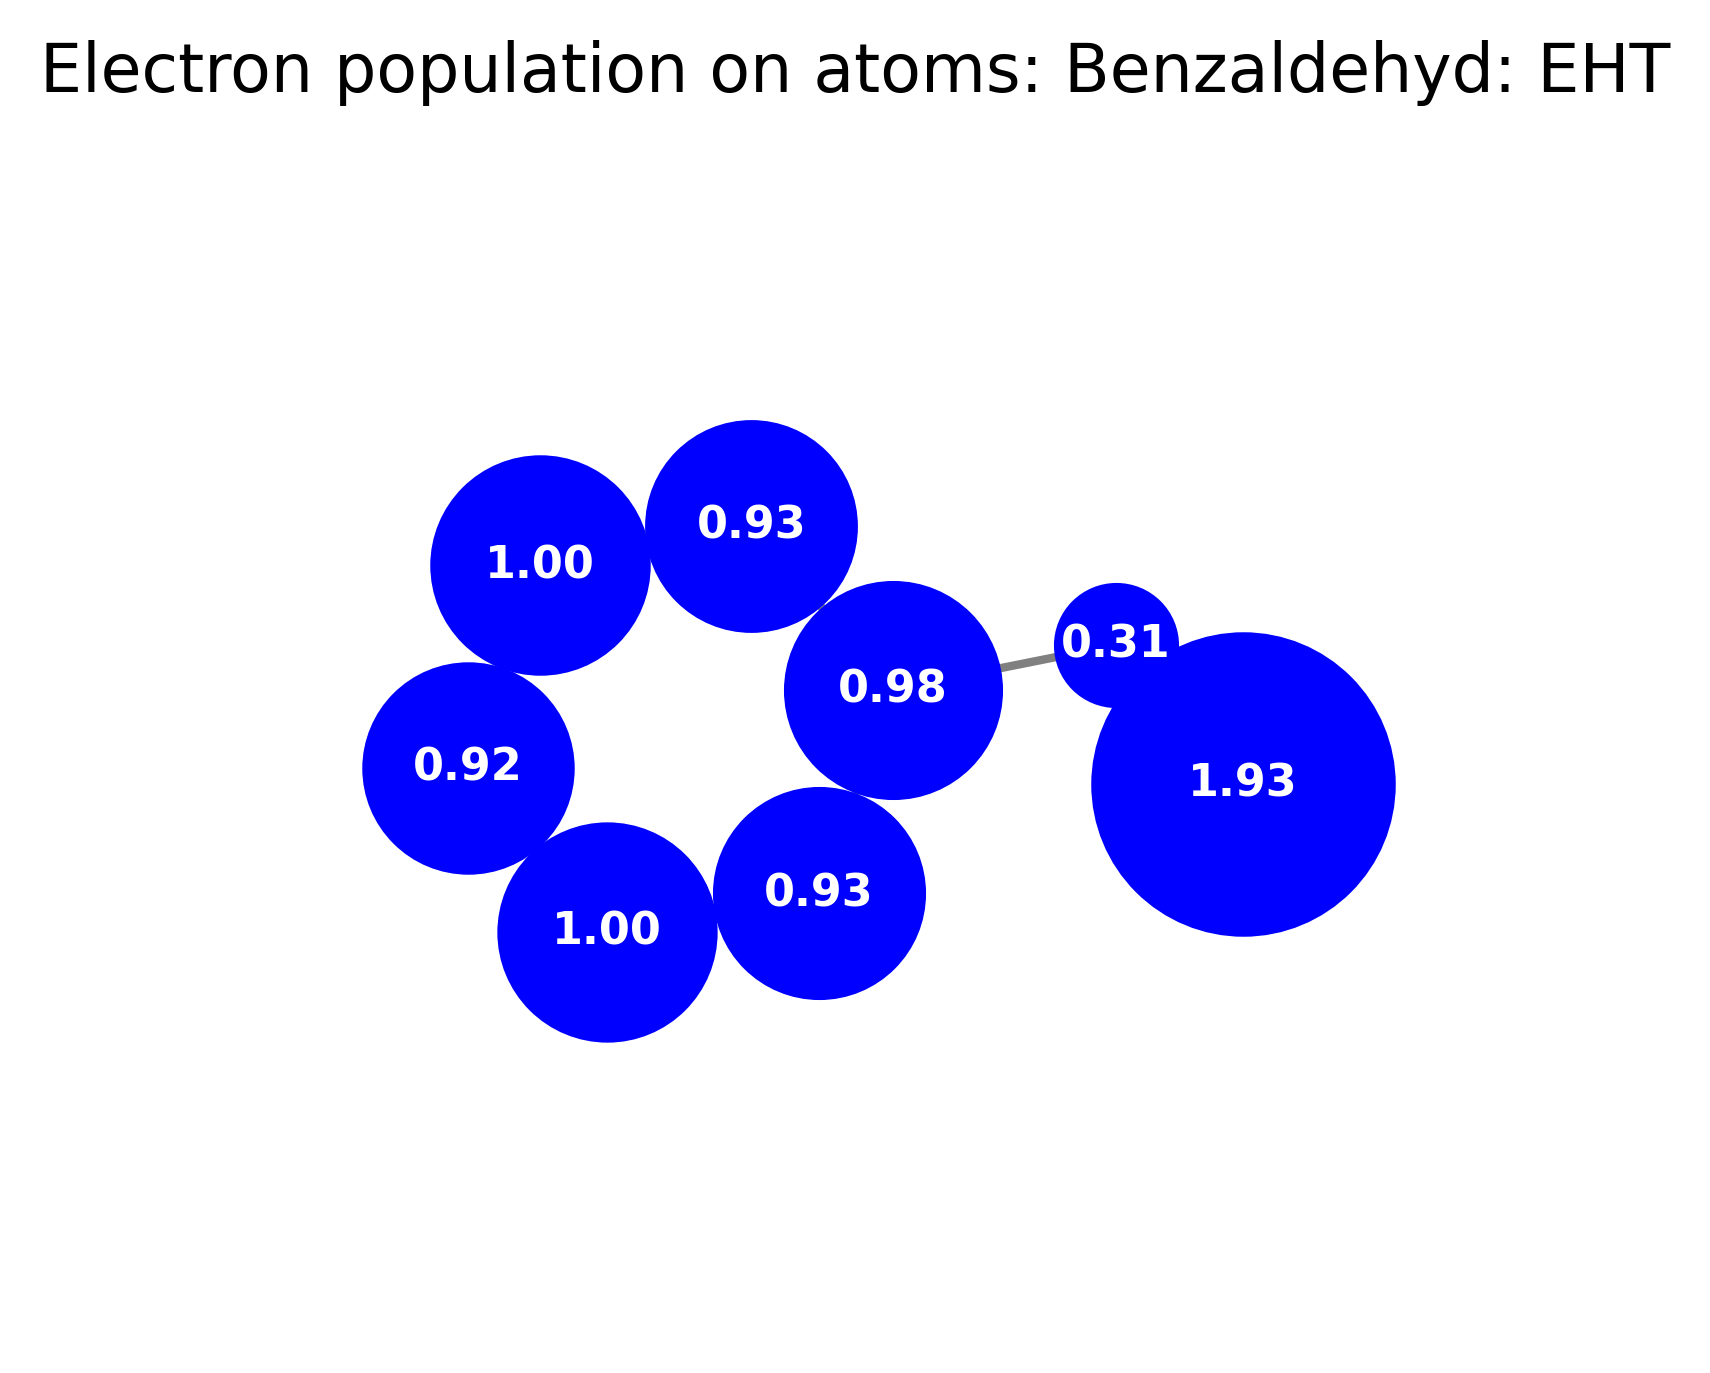

In [63]:
D_huckel = pts.making_D(C_0[:, [9,14,18,19,20,21,22,23]], 8)
print(D_huckel)
pts.plotting_of_D_atoms(8, coordinates, extra_bounds, D_huckel, 'Benzaldehyd', 'EHT')